# Plot pathway mutation scores and purity TxNaive

Script related to figure s4k and s4l

### Aim:
- Plot functional mutation enrichment scores after regressing-out mutation load

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib
import warnings
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import numpy as np

In [3]:
import scipy

In [4]:
scipy.__version__

'1.4.1'

In [5]:
!ls "../../Data/4/"

Patient_ID.csv                mutation_load_per_sample2.csv
fdrs_df.csv                   ovct_wes_purity.csv
hallmark_mutation_load.txt


### Load mutation score

For plotting purposes we use the normalized (length corrected) data, but for the regression analysis we use the raw counts, since we regress-out the total mutation load.

In [6]:
mutation_score = pd.read_csv(
    "../../Data/4/hallmark_mutation_load_length_corrected.csv",
    sep=",",
    index_col="Unnamed: 0"
)

mutation_score.head()

,RG10T17,RG10T18,RG10T19,RG10T5,RG10T7,RG10T8,RG13T10,RG13T11,RG13T122,RG13T13,...,RG5T13,RG5T14,RG5T15,RG5T16,RG5T17,RG5T22,RG6T12,RG6T13,RG6T16,RG6T3
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.015000,0.015000,0.010000,0.010000,0.010000,0.010000,0.005,0.005,0.005,0.000,...,0.00500,0.00500,0.00000,0.00000,0.00000,0.00000,0.010000,0.010000,0.005000,0.015000
HALLMARK_HYPOXIA,0.010000,0.005000,0.005000,0.005000,0.005000,0.005000,0.010,0.015,0.005,0.005,...,0.01000,0.01000,0.00500,0.00500,0.00500,0.00500,0.005000,0.000000,0.005000,0.000000
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.027027,0.027027,0.027027,0.027027,0.027027,0.027027,0.000,0.000,0.000,0.000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
HALLMARK_MITOTIC_SPINDLE,0.020000,0.015000,0.020000,0.015000,0.020000,0.020000,0.010,0.005,0.000,0.000,...,0.01000,0.00500,0.00500,0.00500,0.01000,0.01000,0.020000,0.015000,0.020000,0.025000
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.023810,0.023810,0.023810,0.023810,0.023810,0.023810,0.000,0.000,0.000,0.000,...,0.02381,0.02381,0.02381,0.02381,0.02381,0.02381,0.095238,0.119048,0.095238,0.095238


In [7]:
mutation_score.tail()

,RG10T17,RG10T18,RG10T19,RG10T5,RG10T7,RG10T8,RG13T10,RG13T11,RG13T122,RG13T13,...,RG5T13,RG5T14,RG5T15,RG5T16,RG5T17,RG5T22,RG6T12,RG6T13,RG6T16,RG6T3
HALLMARK_KRAS_SIGNALING_UP,0.005000,0.000000,0.005000,0.005000,0.005000,0.000000,0.005,0.00,0.0,0.0,...,0.005000,0.000000,0.005000,0.010000,0.010000,0.000000,0.005000,0.010000,0.010000,0.005000
HALLMARK_KRAS_SIGNALING_DN,0.010000,0.005000,0.005000,0.015000,0.020000,0.005000,0.000,0.01,0.0,0.0,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.005000,0.005000
HALLMARK_PANCREAS_BETA_CELLS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StromalSignature,0.000000,0.007092,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007092,0.007092,0.007092,0.014184
ImmuneSignature,0.014184,0.007092,0.007092,0.007092,0.007092,0.007092,0.000,0.00,0.0,0.0,...,0.007092,0.007092,0.007092,0.007092,0.007092,0.007092,0.007092,0.007092,0.007092,0.007092


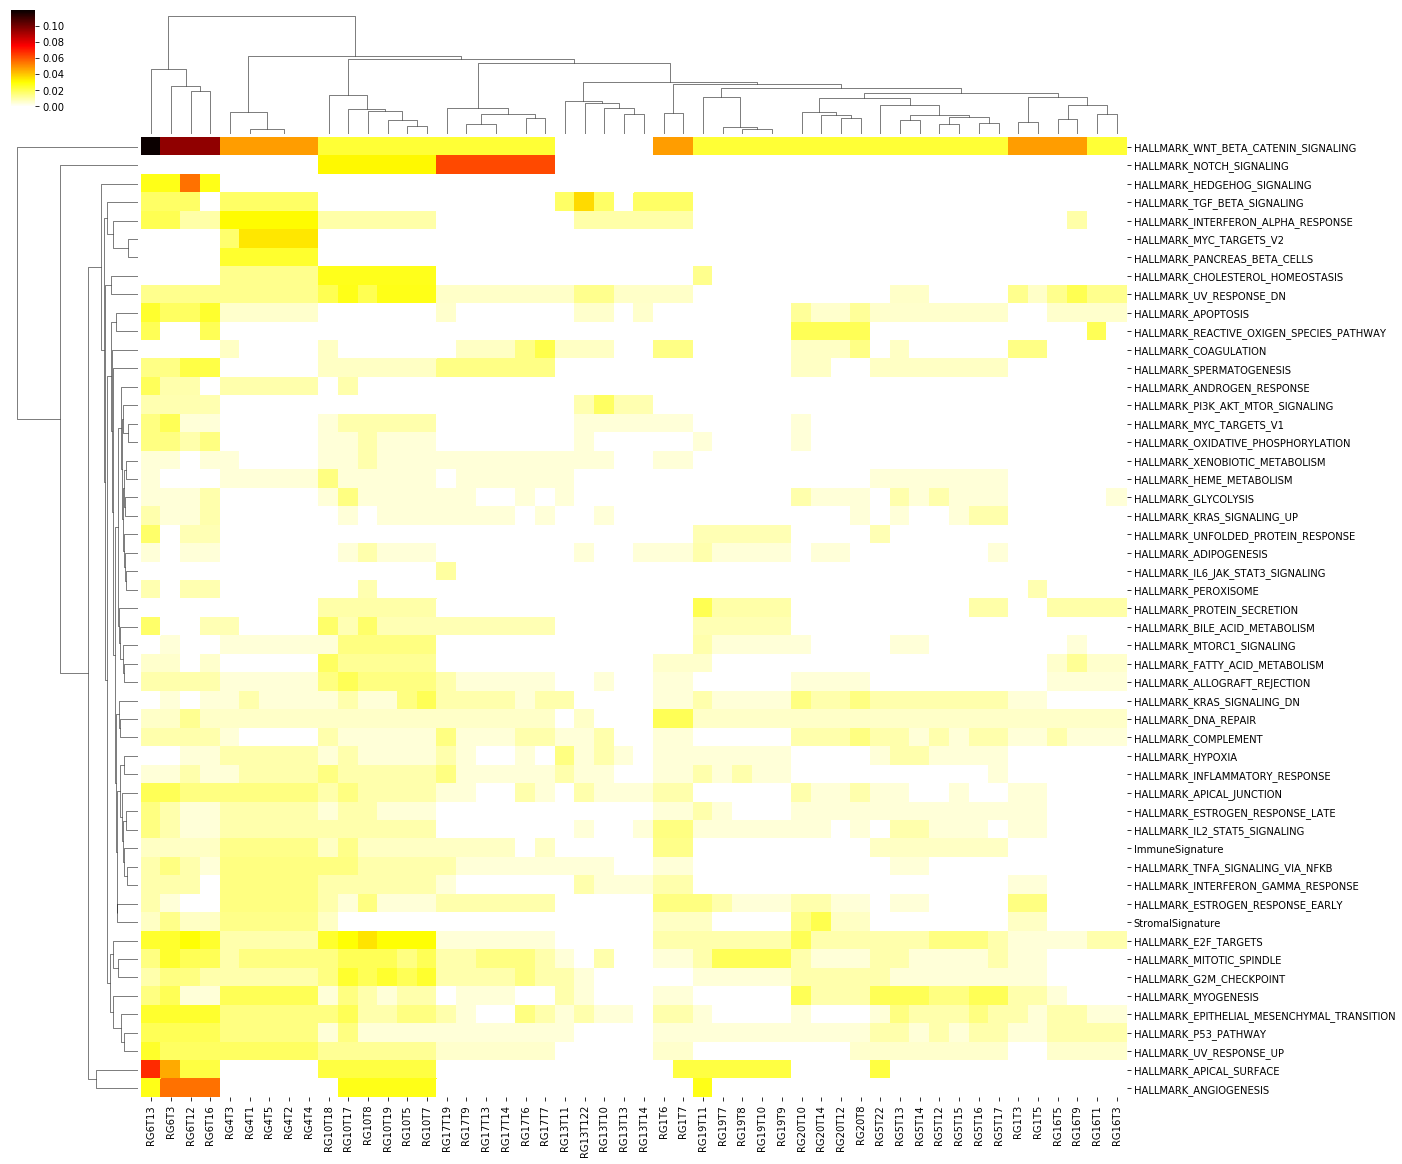

In [9]:
sns.clustermap(
    data=mutation_score,
    cmap="hot_r",
    figsize=(20,20)
)

plt.show()

### Load purity score

In [10]:
tumor_cellularity = pd.read_csv(
    "../../Data/4/ovct_wes_purity.csv",
    sep=",",
    index_col="Unnamed: 0"
).T

tumor_cellularity["purity_color"] = tumor_cellularity["ovct_wes_purity"].replace(
    ["High", "Low"], ["k","w"]
)

tumor_cellularity["hot_cold_color"] = tumor_cellularity["ovct_wes_purity"].replace(
    ["High", "Low"], ["b","r"]
)

tumor_cellularity["ovct_wes_purity_val"].astype(float, inplace=True)

tumor_cellularity.sort_values(by="ovct_wes_purity_val", ascending=False, inplace=True)

tumor_cellularity.head()


,ovct_wes_purity,ovct_wes_purity_val,purity_color,hot_cold_color
RG20T8,High,0.8884,k,b
RG20T14,High,0.8704,k,b
RG20T10,High,0.8651,k,b
RG1T6,High,0.8579,k,b
RG20T12,High,0.808,k,b


In [11]:
tumor_cellularity.shape

(50, 4)

In [12]:
mutation_score.shape

(52, 50)

### convert purity values to grey scale color


In [13]:
cmp = plt.cm.binary
norm = matplotlib.colors.Normalize(vmin=tumor_cellularity['ovct_wes_purity_val'].min(),
                                   vmax=tumor_cellularity['ovct_wes_purity_val'].max(),
                                   clip=False)

mapper = cm.ScalarMappable(norm=norm,
                           cmap=cm.binary)

with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")
    tumcell_vals = mapper.to_rgba(tumor_cellularity['ovct_wes_purity_val'].astype(float))
    print ('NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For')

    na_ind = [i for i, x in enumerate(tumor_cellularity['ovct_wes_purity_val'].isna()) if x]

tumcell_vals[na_ind] = [0,0,0,0]

len(tumcell_vals)


NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For


50

### Reorder mutation score dataframe columns

In [14]:
mutation_score = mutation_score[tumor_cellularity.index]

In [15]:
mutation_score.head()

,RG20T8,RG20T14,RG20T10,RG1T6,RG20T12,RG17T19,RG6T12,RG6T16,RG1T7,RG16T5,...,RG13T13,RG5T14,RG19T11,RG1T5,RG10T7,RG17T9,RG13T14,RG10T8,RG17T6,RG17T7
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.00000,0.00000,0.00000,0.005000,0.00000,0.01000,0.010000,0.005000,0.005000,0.000000,...,0.000,0.00500,0.000000,0.000000,0.010000,0.00500,0.0,0.010000,0.00500,0.00500
HALLMARK_HYPOXIA,0.00000,0.00000,0.00000,0.005000,0.00000,0.01000,0.005000,0.005000,0.005000,0.000000,...,0.005,0.01000,0.005000,0.000000,0.005000,0.00500,0.0,0.005000,0.00500,0.00000
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.013514,0.000000,0.027027,0.00000,0.0,0.027027,0.00000,0.00000
HALLMARK_MITOTIC_SPINDLE,0.00500,0.00500,0.01000,0.005000,0.00500,0.01000,0.020000,0.020000,0.005000,0.000000,...,0.000,0.00500,0.010000,0.005000,0.020000,0.01000,0.0,0.020000,0.01500,0.01000
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.02381,0.02381,0.02381,0.047619,0.02381,0.02381,0.095238,0.095238,0.047619,0.047619,...,0.000,0.02381,0.023810,0.047619,0.023810,0.02381,0.0,0.023810,0.02381,0.02381


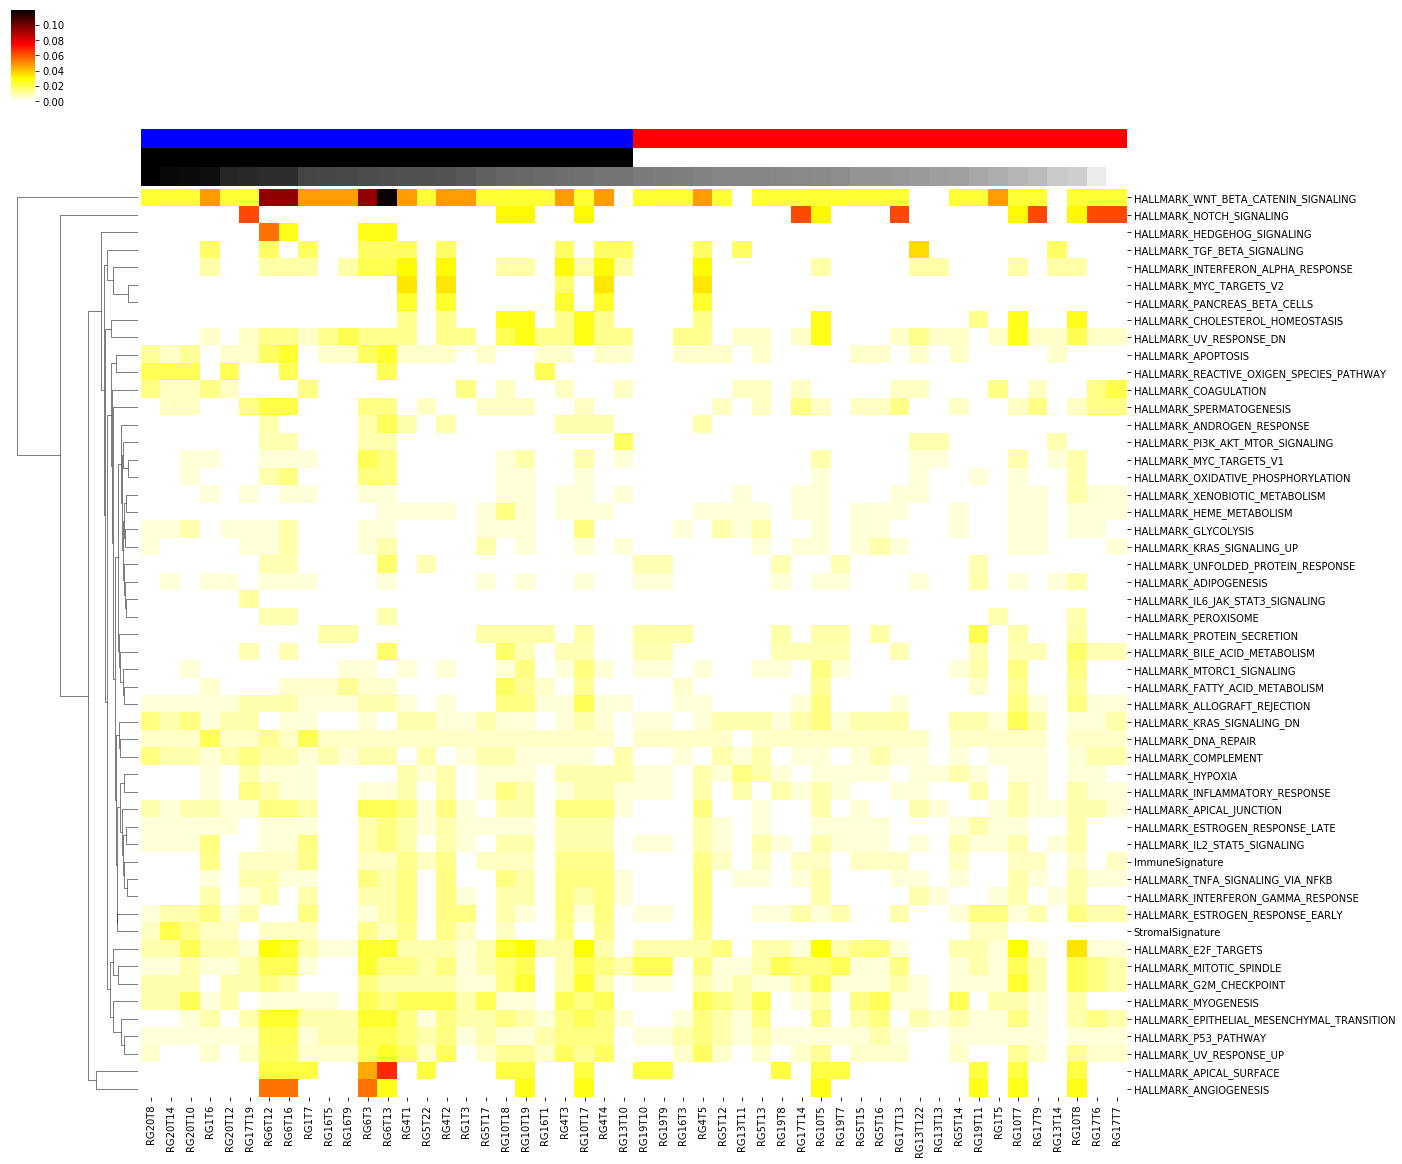

In [16]:
sns.clustermap(
    data=mutation_score,
    cmap="hot_r",
    figsize=(20,20),
    col_colors=[
        tumor_cellularity["hot_cold_color"],
        tumor_cellularity["purity_color"],
        tumcell_vals        
    ],
    col_cluster=False
)

plt.show()

### add samples colors

In [17]:
file_keys = '../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity_mRNAtumourCellularity.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES,TumourCellularity_mRNA,mRNA_binary_TumourCellularity
Well,,,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973,0.730147,Low
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065,0.673548,Low
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551,0.664978,Low
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496,0.833913,High
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706,0.801248,High


In [18]:
colors_samples_dict = dict(zip(sample_labels.Case_mRNA, sample_labels.Colour))

colors_samples_dict[19] = "#68C3A6"
colors_samples_dict[20] = "#8DA0CA"

colors_samples_dict

{1: '#e41a1c',
 4: '#377eb8',
 5: '#4daf4a',
 6: '#984ea3',
 10: '#ff7f00',
 13: '#ffff33',
 16: '#a65628',
 17: '#f781bf',
 19: '#68C3A6',
 20: '#8DA0CA'}

In [19]:
cols_lst = []
for s in tumor_cellularity.index:
    
    cols_lst.append(colors_samples_dict[int(s.split("T")[0][2:])])
    
cols_df = pd.DataFrame({
    "index" : tumor_cellularity.index,
    "color" : pd.Series(cols_lst)
})

cols_df.set_index("index", inplace=True)

tumor_cellularity["color"] = cols_df["color"]

tumor_cellularity.head()

,ovct_wes_purity,ovct_wes_purity_val,purity_color,hot_cold_color,color
RG20T8,High,0.8884,k,b,#8DA0CA
RG20T14,High,0.8704,k,b,#8DA0CA
RG20T10,High,0.8651,k,b,#8DA0CA
RG1T6,High,0.8579,k,b,#e41a1c
RG20T12,High,0.808,k,b,#8DA0CA


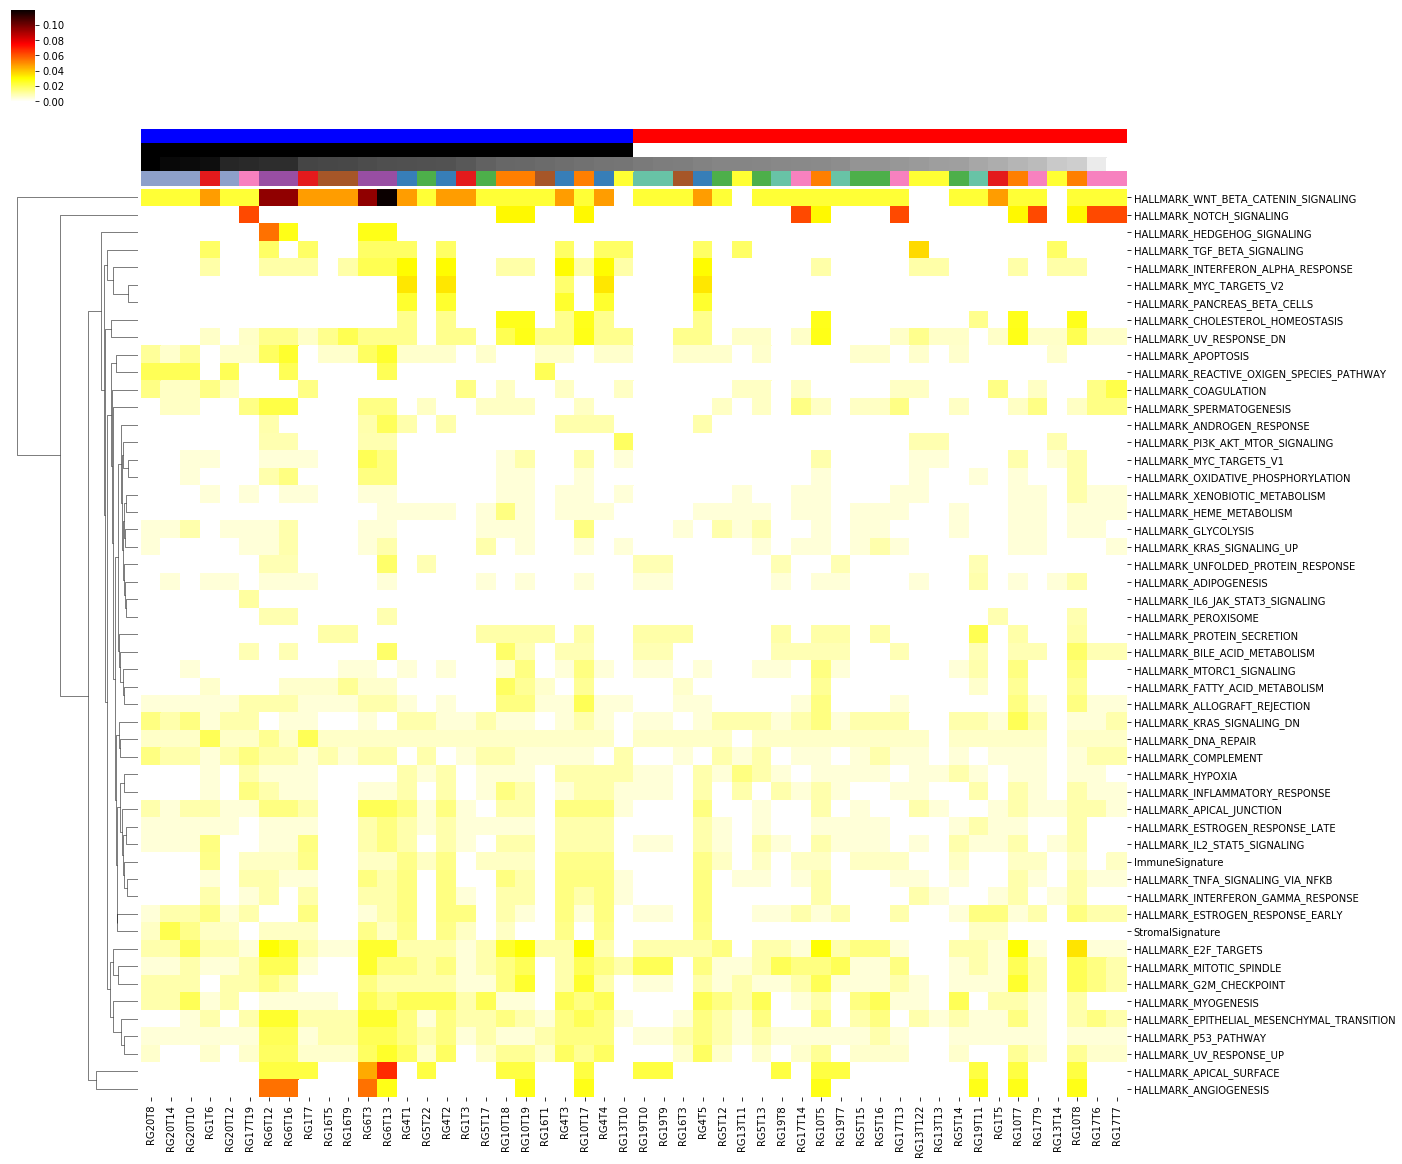

In [20]:
sns.clustermap(
    data=mutation_score,
    cmap="hot_r",
    figsize=(20,20),
    col_colors=[
        tumor_cellularity["hot_cold_color"],
        tumor_cellularity["purity_color"],
        tumcell_vals,
        tumor_cellularity["color"]
    ],
    col_cluster=False
)

plt.show()

### Add mutation load

In [22]:
mutload = pd.read_csv(
    "../../Data/4/mutation_load_per_sample.csv",
    sep=",",
    index_col="Unnamed: 0"
).T

mutload.head()

mutload.shape

(51, 2)

In [23]:
set(mutload.index.sort_values()) ^ set(tumor_cellularity.index.sort_values())

{'RG5T24'}

In [24]:
tumor_cellularity["mutload"] = mutload["mutation_load_per_sample"]

tumor_cellularity.shape

(50, 6)

In [25]:
tumor_cellularity.head()

,ovct_wes_purity,ovct_wes_purity_val,purity_color,hot_cold_color,color,mutload
RG20T8,High,0.8884,k,b,#8DA0CA,94
RG20T14,High,0.8704,k,b,#8DA0CA,110
RG20T10,High,0.8651,k,b,#8DA0CA,111
RG1T6,High,0.8579,k,b,#e41a1c,139
RG20T12,High,0.808,k,b,#8DA0CA,71


In [26]:
tumor_cellularity['mutload'] = tumor_cellularity['mutload'].astype(float)

In [27]:
cmp = plt.cm.Reds
norm = matplotlib.colors.Normalize(vmin=tumor_cellularity['mutload'].min(),
                                   vmax=tumor_cellularity['mutload'].max(),
                                   clip=False)

mapper = cm.ScalarMappable(norm=norm,
                           cmap=cm.Reds)

with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")
    mutload_vals = mapper.to_rgba(tumor_cellularity['mutload'].astype(float))
    print ('NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For')

    na_ind = [i for i, x in enumerate(tumor_cellularity['mutload'].isna()) if x]

mutload_vals[na_ind] = [0,0,0,0]

len(mutload_vals)


NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For


50

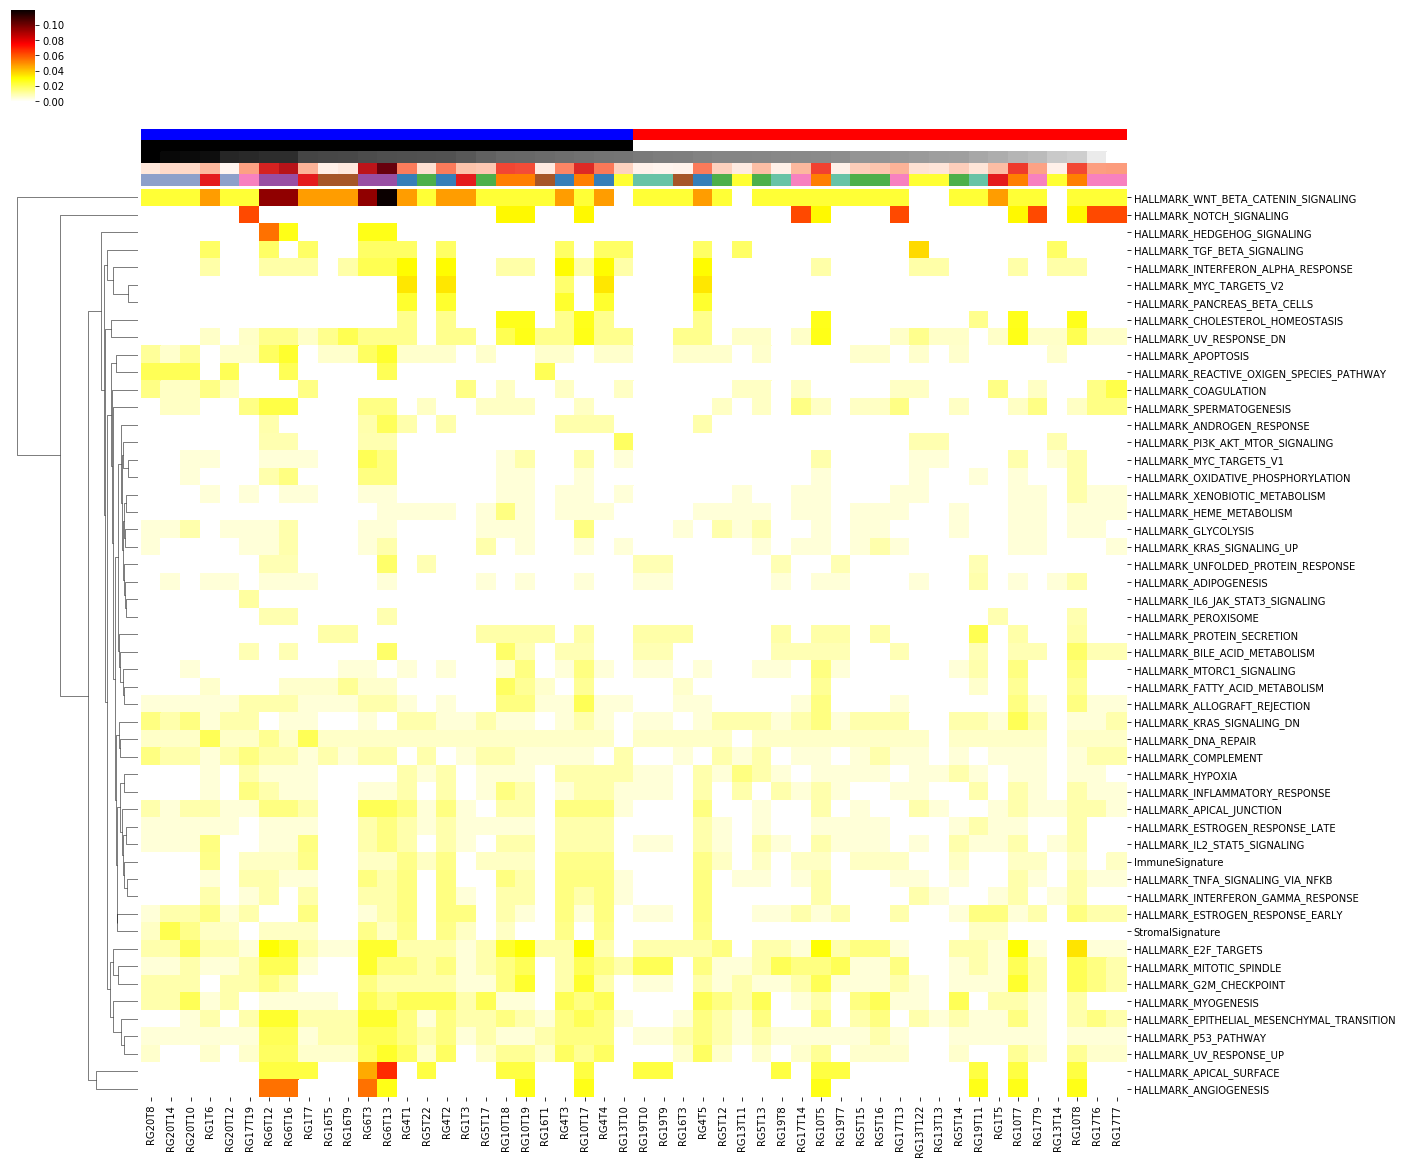

In [28]:
sns.clustermap(
    data=mutation_score,
    cmap="hot_r",
    figsize=(20,20),
    col_colors=[
        tumor_cellularity["hot_cold_color"],
        tumor_cellularity["purity_color"],
        tumcell_vals,
        mutload_vals,
        tumor_cellularity["color"]
    ],
    col_cluster=False
)

plt.show()

### Add hallmarks colors

In [29]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'HALLMARK_INTERFERON_ALPHA_RESPONSE':           GREEN,
'HALLMARK_INTERFERON_GAMMA_RESPONSE':           GREEN,
'ImmuneSignature':                              GREEN,
'HALLMARK_E2F_TARGETS':                         RED,
'HALLMARK_SPERMATOGENESIS':                     GREY,
'HALLMARK_INFLAMMATORY_RESPONSE':               GREEN,
'HALLMARK_G2M_CHECKPOINT':                      RED,
'HALLMARK_PANCREAS_BETA_CELLS':                 GREY,
'HALLMARK_OXIDATIVE_PHOSPHORYLATION':           GREY,
'HALLMARK_MYC_TARGETS_V1':                      RED,
'HALLMARK_FATTY_ACID_METABOLISM':               GREY,
'HALLMARK_PEROXISOME':                          GREY,
'HALLMARK_DNA_REPAIR':                          RED,
'HALLMARK_UNFOLDED_PROTEIN_RESPONSE':           'purple',
'HALLMARK_KRAS_SIGNALING_DN':                   RED,
'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY':     'purple',
'HALLMARK_CHOLESTEROL_HOMEOSTASIS':             GREY,
'HALLMARK_COMPLEMENT':                          GREEN,
'HALLMARK_MTORC1_SIGNALING':                    RED,
'HALLMARK_IL2_STAT5_SIGNALING':                 GREEN,
'HALLMARK_ADIPOGENESIS':                        GREY,
'HALLMARK_KRAS_SIGNALING_UP':                   RED,
'HALLMARK_HEME_METABOLISM':                     GREY,
'HALLMARK_PI3K_AKT_MTOR_SIGNALING':             RED,
'HALLMARK_ANDROGEN_RESPONSE':                   GREY,
'HALLMARK_PROTEIN_SECRETION':                   GREY,
'HALLMARK_P53_PATHWAY':                         RED,
'HALLMARK_UV_RESPONSE_UP':                      'purple',
'HALLMARK_MYC_TARGETS_V2':                      RED,
'StromalSignature':                             BLUE,
'HALLMARK_MITOTIC_SPINDLE':                     RED,
'HALLMARK_GLYCOLYSIS':                          RED,
'HALLMARK_APICAL_JUNCTION':                     BLUE,
'HALLMARK_HYPOXIA':                             'purple',
'HALLMARK_TNFA_SIGNALING_VIA_NFKB':             GREEN,
'HALLMARK_APOPTOSIS':                           GREY,
'HALLMARK_APICAL_SURFACE':                      GREY,
'HALLMARK_UV_RESPONSE_DN':                      'purple',
'HALLMARK_TGF_BETA_SIGNALING':                  'purple',
'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':   BLUE,
'HALLMARK_NOTCH_SIGNALING':                     RED,
'HALLMARK_WNT_BETA_CATENIN_SIGNALING':          RED,
'HALLMARK_ALLOGRAFT_REJECTION':                 GREEN,
'HALLMARK_XENOBIOTIC_METABOLISM':               GREY,
'HALLMARK_ANGIOGENESIS':                        BLUE,
'HALLMARK_BILE_ACID_METABOLISM':                GREY,
'HALLMARK_COAGULATION':                         GREY,
'HALLMARK_ESTROGEN_RESPONSE_EARLY':             GREY,
'HALLMARK_ESTROGEN_RESPONSE_LATE':              GREY,
'HALLMARK_HEDGEHOG_SIGNALING':                  RED,
'HALLMARK_IL6_JAK_STAT3_SIGNALING':             GREEN,
'HALLMARK_MYOGENESIS':                          GREY,
'Purity_RNA':                                  'k',
'TumourCellularity_mRNA': 'k'
}

In [30]:
color_sets_df = pd.DataFrame.from_dict(color_sets, orient='index')

color_sets_df.head()

,0
HALLMARK_INTERFERON_ALPHA_RESPONSE,#007F00
HALLMARK_INTERFERON_GAMMA_RESPONSE,#007F00
ImmuneSignature,#007F00
HALLMARK_E2F_TARGETS,#CC0000
HALLMARK_SPERMATOGENESIS,#D3D3D3


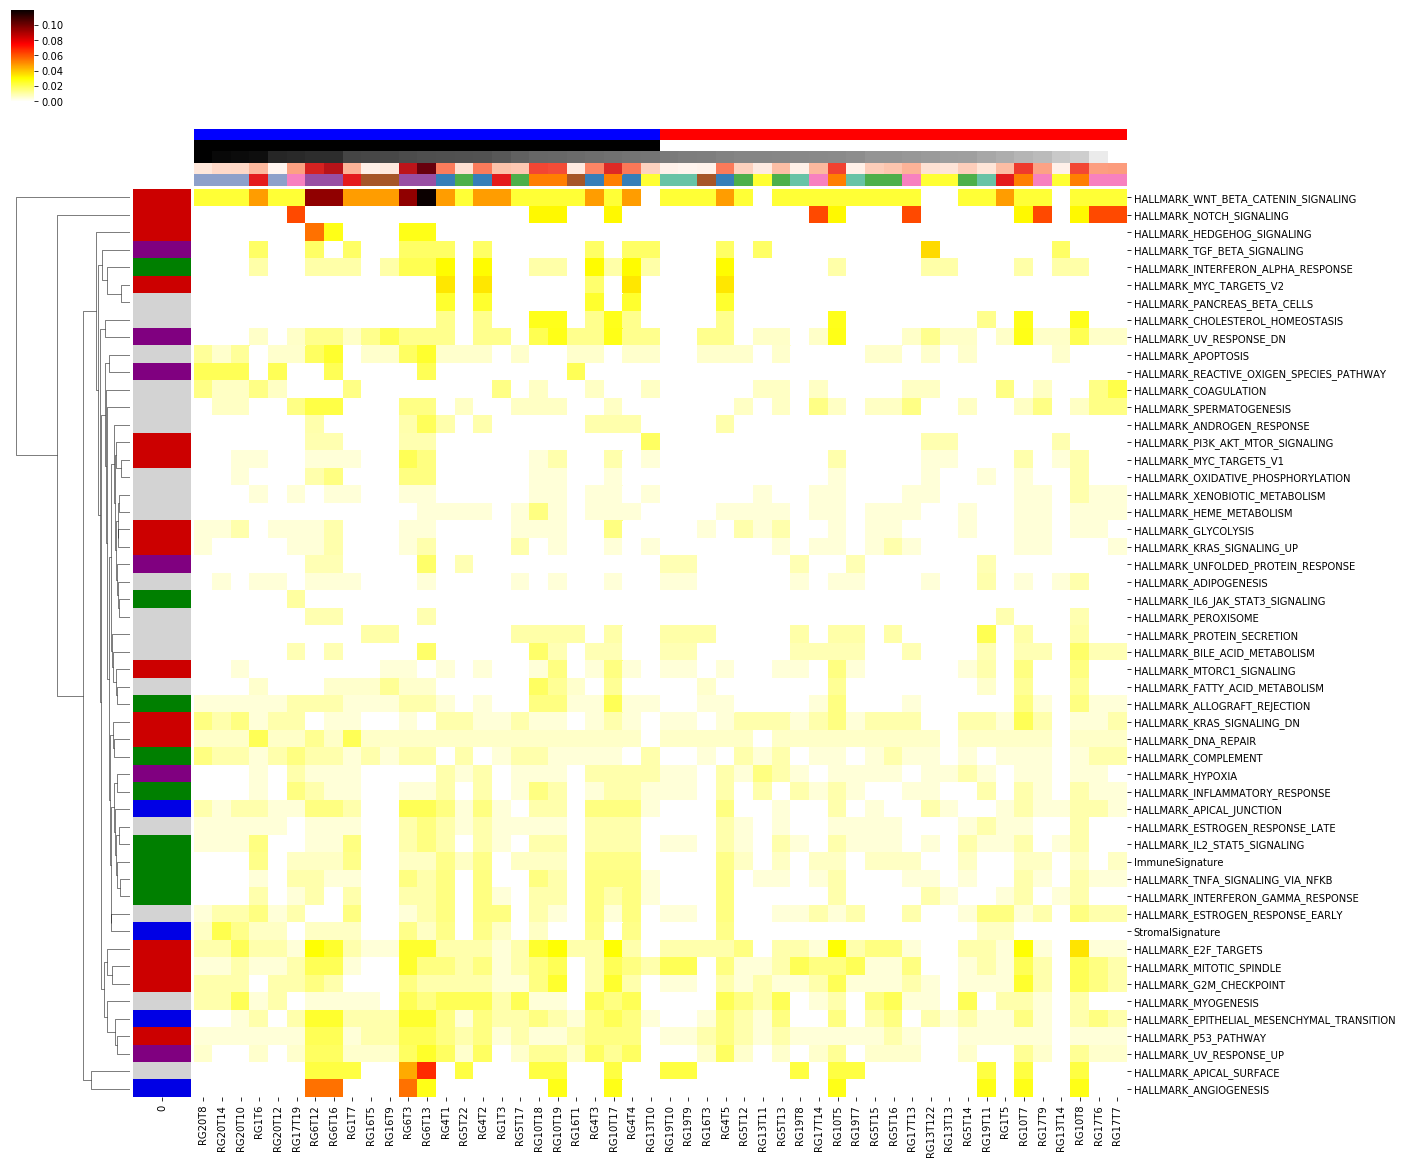

In [31]:
sns.clustermap(
    data=mutation_score,
    cmap="hot_r",
    figsize=(20,20),
    col_colors=[
        tumor_cellularity["hot_cold_color"],
        tumor_cellularity["purity_color"],
        tumcell_vals,
        mutload_vals,
        tumor_cellularity["color"]
    ],
    row_colors=color_sets_df[0],
    col_cluster=False,
    row_cluster=True
)

plt.show()

### Add FDR colors and sort rows


In [32]:
fdrs = pd.read_csv("../../Data/4/fdrs_df.csv", sep=",", index_col="hallmarks")

fdrs.sort_values(by="fdr", inplace=True)

fdrs.head()

,fdr
hallmarks,
HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,0.000437
HALLMARK_APOPTOSIS,0.000437
StromalSignature,0.003091
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.009663
HALLMARK_BILE_ACID_METABOLISM,0.052236


In [33]:
fdrs["fdr_color"] = (fdrs["fdr"]<0.05).replace([True, False], ['y','w'])

In [34]:
set(fdrs.index) ^ set(color_sets_df.index)

{'Purity_RNA', 'TumourCellularity_mRNA'}

In [35]:
color_sets_df["fdr"] = fdrs["fdr"]
color_sets_df["fdr_color"] = fdrs["fdr_color"]

color_sets_df.dropna(inplace=True)

color_sets_df.head()


,0,fdr,fdr_color
HALLMARK_INTERFERON_ALPHA_RESPONSE,#007F00,0.889377,w
HALLMARK_INTERFERON_GAMMA_RESPONSE,#007F00,0.890385,w
ImmuneSignature,#007F00,0.854112,w
HALLMARK_E2F_TARGETS,#CC0000,0.961385,w
HALLMARK_SPERMATOGENESIS,#D3D3D3,0.761562,w


In [36]:
color_sets_df.sort_values(by="fdr", inplace=True)

In [37]:
mutation_score = mutation_score.reindex(color_sets_df.index)

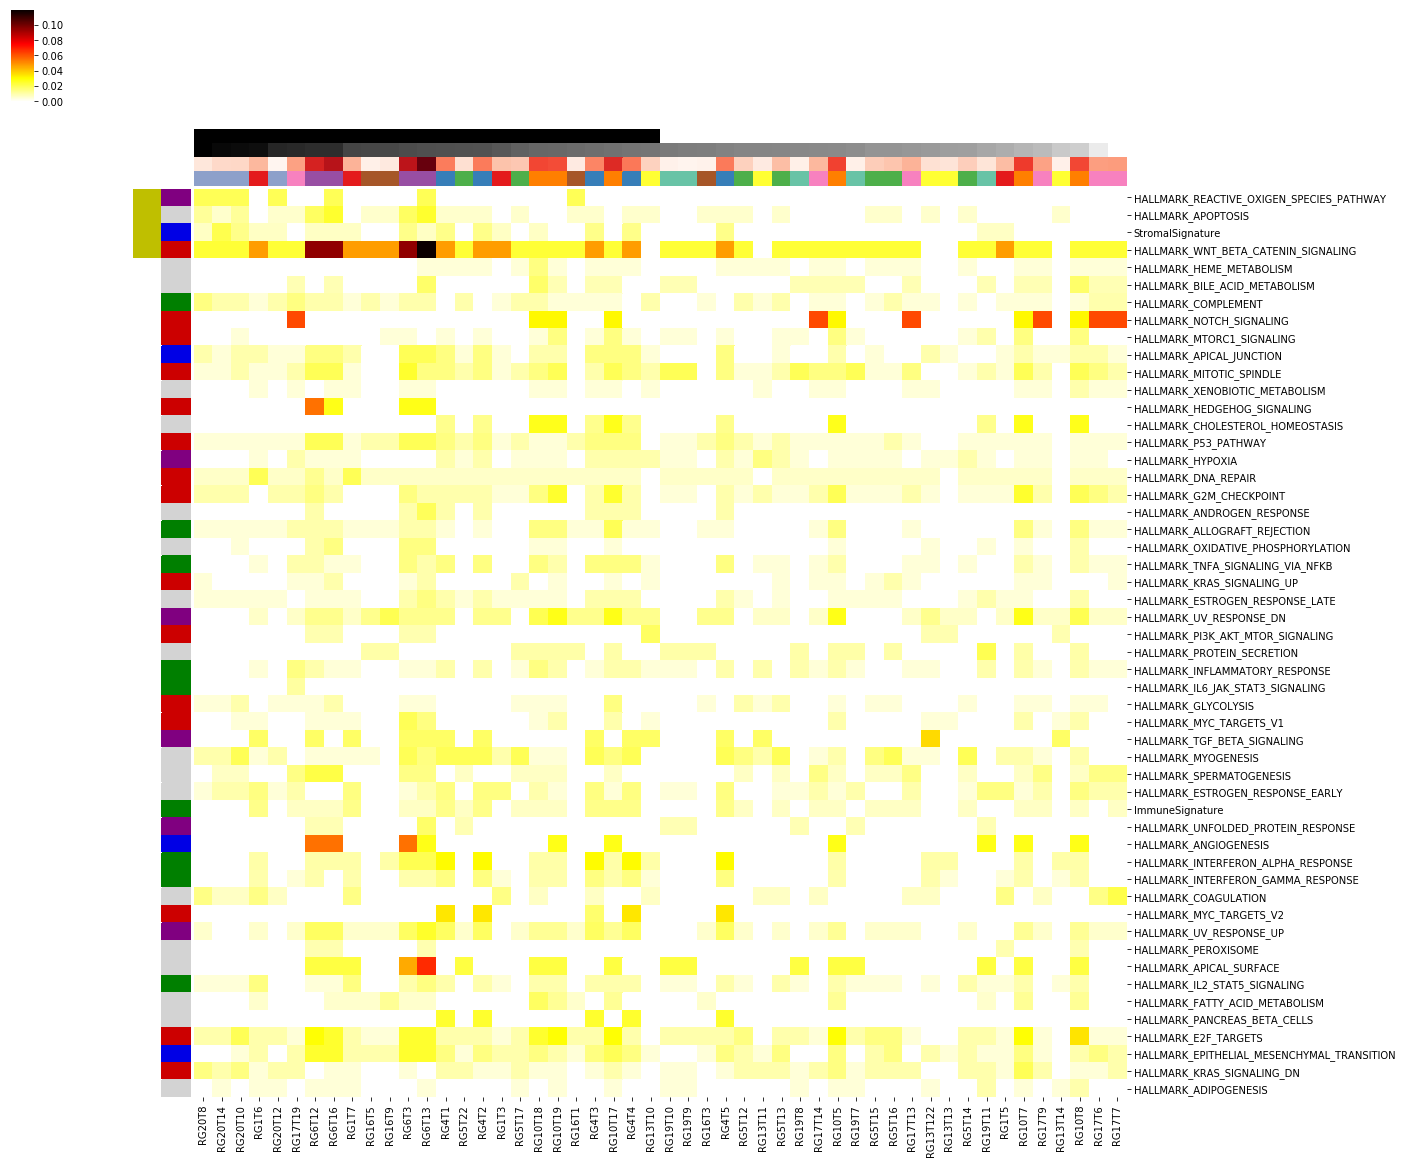

In [38]:
ax = sns.clustermap(
    data=mutation_score,
    cmap="hot_r",
    figsize=(20,20),
    col_colors=[
        #tumor_cellularity["hot_cold_color"],
        tumor_cellularity["purity_color"],
        tumcell_vals,
        mutload_vals,
        tumor_cellularity["color"]
    ],
    row_colors=[
        color_sets_df["fdr_color"],
        color_sets_df[0]
               ],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.0, rasterized=True
)

In [39]:
ax.savefig("../../Figures/supplementary/4/panels/s4k_mutation_scores.pdf")

## Check correlation between mut score and mRNA NES

In [40]:
hallmark_nes = pd.read_csv("../../Data/1/HallmarksStromaImmune_NES.txt",
                           sep="\t", index_col="Term")

hallmark_nes.index

Index(['HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_MITOTIC_SPINDLE',
       'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_TGF_BETA_SIGNALING',
       'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_DNA_REPAIR',
       'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_APOPTOSIS',
       'HALLMARK_NOTCH_SIGNALING', 'HALLMARK_ADIPOGENESIS',
       'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE',
       'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_MYOGENESIS',
       'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
       'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_APICAL_JUNCTION',
       'HALLMARK_APICAL_SURFACE', 'HALLMARK_HEDGEHOG_SIGNALING',
       'HALLMARK_COMPLEMENT', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE',
       'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_MTORC1_SIGNALING',
       'HALLMARK_E2F_TARGETS', 'HALLMARK_MYC_TARGETS_V1',
       'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_EPITHELIAL_MES

In [41]:
mappings = pd.read_csv(
    "../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity_mRNAtumourCellularity.txt",
    sep="\t",
    index_col="Well")

mappings.dropna(inplace=True)

mappings["Tumour_WES"].replace(
    ["Replicates (12/13)","Replicates (14/15)","Replicates (16/17)"],
    ["12", "14", "16"],
    inplace=True
)

mappings.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES,TumourCellularity_mRNA,mRNA_binary_TumourCellularity
Well,,,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973,0.730147,Low
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065,0.673548,Low
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551,0.664978,Low
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496,0.833913,High
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706,0.801248,High


In [42]:
mappings["WES_Label"] = "RG"+mappings["Case_WES"].astype(int).astype(str)+"T"+mappings["Tumour_WES"].astype(int).astype(str)

mappings["WES_Label"].head()

Well
A01     RG10T5
A02     RG10T7
A03     RG10T8
A04    RG10T17
A05    RG10T18
Name: WES_Label, dtype: object

In [43]:
wnt_nes = []
wnt_mut = []
apo_nes = []
apo_mut = []
ros_nes = []
ros_mut = []
str_nes = []
str_mut = []
purity_mrna = []
purity_wes = []
PATIENT_ID = []

purity_wes_median = tumor_cellularity["ovct_wes_purity_val"].median()

for well in mappings.index:
    
    PATIENT_ID.append("case_"+str(mappings["Case_mRNA"][well]))
    
    wnt_nes.append(hallmark_nes[well]["HALLMARK_WNT_BETA_CATENIN_SIGNALING"])
    apo_nes.append(hallmark_nes[well]["HALLMARK_APOPTOSIS"])
    ros_nes.append(hallmark_nes[well]["HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY"])
    str_nes.append(hallmark_nes[well]["StromalSignature"])

    
    wnt_mut.append(mutation_score[mappings["WES_Label"][well]]["HALLMARK_WNT_BETA_CATENIN_SIGNALING"])
    apo_mut.append(mutation_score[mappings["WES_Label"][well]]["HALLMARK_APOPTOSIS"])
    ros_mut.append(mutation_score[mappings["WES_Label"][well]]["HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY"])
    str_mut.append(mutation_score[mappings["WES_Label"][well]]["StromalSignature"])
    
    purity_mrna_score = mappings["mRNA_binary_TumourCellularity"][well]
    
    if purity_mrna_score == "High":
    
        purity_mrna.append("b")
        
    elif purity_mrna_score == "Low":
        
        purity_mrna.append("r")
        
    purity_wes_score = float(tumor_cellularity["ovct_wes_purity_val"][mappings["WES_Label"][well]])
    
    if purity_wes_score > purity_wes_median:
        
        purity_wes.append("b")
        
    else:
        
        purity_wes.append("r")

In [44]:
cor_df = pd.DataFrame({
    "index" : mappings.index,
    "purity_mrna" : pd.Series(purity_mrna),
    "purity_wes" : pd.Series(purity_wes),
    "wnt_nes" : pd.Series(wnt_nes),
    "wnt_mut" : pd.Series(wnt_mut),
    "apo_nes" : pd.Series(apo_nes),
    "apo_mut" : pd.Series(apo_mut),
    "ros_nes" : pd.Series(ros_nes),
    "ros_mut" : pd.Series(ros_mut),
    "str_nes" : pd.Series(str_nes),
    "str_mut" : pd.Series(str_mut),
    "patiend_ID" : pd.Series(PATIENT_ID).astype(str)
})

cor_df.set_index("index", inplace=True)

In [45]:
cor_df.to_csv("../../Data/4/SNV_NES.csv", sep=",")

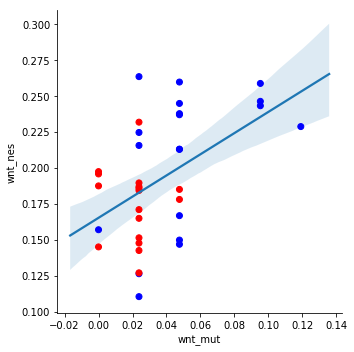

In [46]:
ax = sns.lmplot(
    data=cor_df,
    x="wnt_mut",
    y="wnt_nes",
    scatter_kws={"alpha" : 0}
)

plt.scatter(
    x=cor_df["wnt_mut"],
    y=cor_df["wnt_nes"],
    color=cor_df["purity_wes"]
)

plt.show()

In [47]:
len(cor_df["wnt_mut"].dropna())

36

In [48]:
import scipy.stats

In [49]:
scipy.stats.shapiro(cor_df["wnt_mut"].dropna())

# not normal

(0.8230350613594055, 4.83306466776412e-05)

In [50]:
scipy.stats.shapiro(cor_df["wnt_nes"].dropna())
 #normal

(0.9633772373199463, 0.27263712882995605)

In [51]:
scipy.stats.normaltest(cor_df["wnt_mut"].dropna())
# not normal

NormaltestResult(statistic=11.657079091622828, pvalue=0.0029423710419326653)

In [52]:
scipy.stats.normaltest(cor_df["wnt_nes"].dropna())
# normal

NormaltestResult(statistic=4.07680549343185, pvalue=0.130236565618043)

In [53]:
scipy.stats.levene(
    cor_df["wnt_mut"].dropna(),
    cor_df["wnt_nes"].dropna()
)

# heteroscedastic

LeveneResult(statistic=7.957073415047251, pvalue=0.006227517100499043)

In [54]:
kendalltau(cor_df["wnt_mut"], cor_df["wnt_nes"], method="asymptotic")

KendalltauResult(correlation=0.31836687337621733, pvalue=0.014381813689613174)

In [55]:
ax.savefig("../../Figures/supplementary/4/panels/s4l_WNT_muts_nes.pdf")

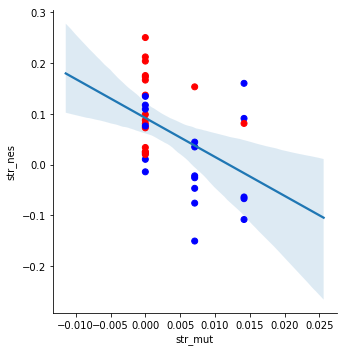

In [56]:
ax = sns.lmplot(
    data=cor_df,
    x="str_mut",
    y="str_nes",
    scatter_kws={"alpha" : 0}
)

plt.scatter(
    x=cor_df["str_mut"],
    y=cor_df["str_nes"],
    color=cor_df["purity_wes"]
)

plt.show()

In [57]:
scipy.stats.shapiro(cor_df["str_mut"].dropna())

# not normal

(0.6927353143692017, 2.179551330527829e-07)

In [58]:
scipy.stats.levene(
    cor_df["str_mut"].dropna(),
    cor_df["str_nes"].dropna()
)

# hetero

LeveneResult(statistic=61.75997476462613, pvalue=3.3250136114608216e-11)

In [59]:
kendalltau(cor_df["str_mut"], cor_df["str_nes"], method="asymptotic")

KendalltauResult(correlation=-0.35474314176487404, pvalue=0.008203759423121496)

In [60]:
ax.savefig("../../Figures/supplementary/4/panels/s4l_STR_muts_nes.pdf")

# End script